In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV
#archivo_csv = "C:\\Users\\User\\Documents\\MAESTRIA-BIG-DATA\\MAESTRIA\\TFM\\Datos completos\\DatosCompletosOriginal.csv"


In [20]:
# Cargar el archivo CSV
df = pd.read_csv(archivo_csv, nrows=1000000, sep=';', on_bad_lines='skip', encoding='utf-8', low_memory=False)

# Verificar las primeras filas para asegurarnos de que las columnas existen
print("Columnas originales:")
print(df.columns)

Columnas originales:
Index(['NumeroFactura', 'FechaVenta', 'TotalMercancia', 'TotalDescuento',
       'TotalImpuesto', 'TotalCosto', 'Precio', 'Impuesto', 'Cantidad',
       'Costo',
       ...
       'Activa.1', 'FechaCreacion', 'Creado_Por', 'Actualizado_Por',
       'Fecha_Actualizacion', 'Detalle', 'Precio.1', 'PrecioConImpuesto',
       'Tipo', 'Actualizado'],
      dtype='object', length=123)


In [21]:
#Quitar el usuario CONSUMIDOR FINAL con IdUser 2222222222222222. Porque genera similitudes erróneas entre productos adquiridos

df = df[df['NombreUser'] != 'CONSUMIDOR FINAL']
df.shape

(850535, 123)

In [22]:
# Filtramos las filas donde CodigoNaturaleza es 2 (Persona Natural)
df = df[df['CodigoNaturaleza'] == 2]
#  Ahora cambiamos el CodigoNaturaleza de esos registros a 1
df['CodigoNaturaleza'] = 1
df_final = df[df['CodigoNaturaleza'] == 1]
df.shape

(848225, 123)

In [23]:
# Mostrar las primeras filas para verificar el cambio
print(df[['CodigoNaturaleza', 'Naturaleza']].head())

   CodigoNaturaleza       Naturaleza
0                 1  PERSONA NATURAL
1                 1  PERSONA NATURAL
2                 1  PERSONA NATURAL
3                 1  PERSONA NATURAL
4                 1  PERSONA NATURAL


In [24]:
# Verificar el tipo de la columna
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
NumeroFactura          int64
FechaVenta            object
TotalMercancia       float64
TotalDescuento       float64
TotalImpuesto        float64
                      ...   
Detalle               object
Precio.1             float64
PrecioConImpuesto    float64
Tipo                 float64
Actualizado          float64
Length: 123, dtype: object


In [26]:

# Definir las columnas que se desean mantener
columnas_deseadas = [
    'NumeroFactura', 'FechaVenta', 'Precio', 'Cantidad', 'ReferenciaProducto', 'CodigoMarca', 'IdUser', 
    'NombreUser', 'CodigoNaturaleza', 'Naturaleza', 'CodigoMedioPago', 'MedioPago', 'NombreProducto', 'NombreMarca', 
    'Talla', 'Color','Grupo', 'Fabricante','ClaseProducto','NombreEstado', 'NombreTienda', 'Clasificacion', 'DepartamentoTienda', 
    'CiudadTienda'
]

# Filtrar el DataFrame para conservar solo las columnas renombradas
df = df[columnas_deseadas]

# Guardar el DataFrame con las columnas en un nuevo archivo
nuevo_archivo = "C:\\Users\\User\\Documents\\MAESTRIA-BIG-DATA\\MAESTRIA\\TFM\\Datos completos\\datos_completos_tfm.csv"
df.to_csv(nuevo_archivo, index=False)

# Ver las primeras filas del DataFrame renombrado
print("\nPrimeras filas del DataFrame:")
print(df.head())



Primeras filas del DataFrame:
   NumeroFactura           FechaVenta    Precio  Cantidad ReferenciaProducto  \
0         238038  2024-01-02 08:02:00   8394.96       1.0             DN8020   
1         215856  2024-01-02 08:07:00     26.89       2.0               BOLM   
2         215856  2024-01-02 08:07:00  10077.31       5.0              30500   
3         215856  2024-01-02 08:07:00  10077.31       6.0              30500   
4         215856  2024-01-02 08:07:00  10077.31       1.0              30500   

  CodigoMarca      IdUser                        NombreUser  CodigoNaturaleza  \
0         DNE  0160392463  ADRIANA TERESITA SANCHEZ MENDOZA                 1   
1         VAR    24080325                       NELLY ROJAS                 1   
2         SLK    24080325                       NELLY ROJAS                 1   
3         SLK    24080325                       NELLY ROJAS                 1   
4         SLK    24080325                       NELLY ROJAS                 1   

 

In [16]:
import pandas as pd
import random

# Asegurarse de que 'FechaVenta' esté en formato datetime
df['FechaVenta'] = pd.to_datetime(df['FechaVenta'], errors='coerce')

# Extraer el mes y año de la columna FechaVenta para agrupar por mes
df['MesAnio'] = df['FechaVenta'].dt.to_period('M')

# Obtener una lista de los meses únicos
meses_unicos = df['MesAnio'].unique()

# Verificar cuántos meses únicos hay
print(f"Meses únicos disponibles: {len(meses_unicos)}")

# Ajustar k si es mayor que el número de meses únicos
k = min(len(meses_unicos), 3)  # Seleccionar hasta 3 meses, pero no más de los que están disponibles

# Seleccionar aleatoriamente los meses
meses_seleccionados = random.sample(list(meses_unicos), k)

# Filtrar el DataFrame para que solo tenga datos de los meses seleccionados
df_filtrado = df[df['MesAnio'].isin(meses_seleccionados)]

# Definir las columnas que se desean mantener
columnas_deseadas = [
    'NumeroFactura', 'FechaVenta', 'Precio', 'Cantidad', 'ReferenciaProducto', 'CodigoMarca', 'IdUser', 
    'NombreUser', 'CodigoNaturaleza', 'Naturaleza', 'CodigoMedioPago', 'MedioPago', 'NombreProducto', 'NombreMarca', 
    'Talla', 'Color','Grupo', 'Fabricante','ClaseProducto','NombreEstado', 'NombreTienda', 'Clasificacion', 'DepartamentoTienda', 
    'CiudadTienda'
]

# Filtrar el DataFrame para conservar solo las columnas deseadas
df_filtrado = df_filtrado[columnas_deseadas]

# Guardar el DataFrame con las columnas en un nuevo archivo
nuevo_archivo = "C:\\Users\\User\\Documents\\MAESTRIA-BIG-DATA\\MAESTRIA\\TFM\\Datos completos\\datos_completos_tfm.csv"
df_filtrado.to_csv(nuevo_archivo, index=False)

# Ver las primeras filas del DataFrame filtrado
print("\nPrimeras filas del DataFrame filtrado:")
print(df_filtrado.head())


Meses únicos disponibles: 3

Primeras filas del DataFrame filtrado:
   NumeroFactura          FechaVenta    Precio  Cantidad ReferenciaProducto  \
0         238038 2024-01-02 08:02:00   8394.96       1.0             DN8020   
1         215856 2024-01-02 08:07:00     26.89       2.0               BOLM   
2         215856 2024-01-02 08:07:00  10077.31       5.0              30500   
3         215856 2024-01-02 08:07:00  10077.31       6.0              30500   
4         215856 2024-01-02 08:07:00  10077.31       1.0              30500   

  CodigoMarca      IdUser                        NombreUser  CodigoNaturaleza  \
0         DNE  0160392463  ADRIANA TERESITA SANCHEZ MENDOZA                 1   
1         VAR    24080325                       NELLY ROJAS                 1   
2         SLK    24080325                       NELLY ROJAS                 1   
3         SLK    24080325                       NELLY ROJAS                 1   
4         SLK    24080325                       NELL

In [27]:
# Seleccionar las columnas de 'Cantidad' y 'Precio'
df_seleccionado = df[['Cantidad', 'Precio']]

# Imprimir la descripción de estas columnas
print(df_seleccionado.describe())

            Cantidad         Precio
count  848225.000000  848225.000000
mean        1.105722   15450.618563
std         1.291543   14347.209342
min         1.000000       0.000000
25%         1.000000    5036.980000
50%         1.000000   15957.980000
75%         1.000000   20159.660000
max       700.000000  184865.550000


In [30]:
# Verificar el tipo de la columna
print("\nTipos de datos de las columnas:")
print(df.dtypes)



Tipos de datos de las columnas:
NumeroFactura           int64
FechaVenta             object
Precio                float64
Cantidad              float64
ReferenciaProducto     object
CodigoMarca            object
IdUser                 object
NombreUser             object
CodigoNaturaleza        int64
Naturaleza             object
CodigoMedioPago         int64
MedioPago              object
NombreProducto         object
NombreMarca            object
Talla                  object
Color                  object
Grupo                  object
Fabricante             object
ClaseProducto          object
NombreEstado           object
NombreTienda           object
Clasificacion          object
DepartamentoTienda     object
CiudadTienda           object
dtype: object


In [31]:
# Mostrar filas con valores nulos en cualquier columna
df_nulos = df[df.isnull().any(axis=1)]
print(df_nulos)

Empty DataFrame
Columns: [NumeroFactura, FechaVenta, Precio, Cantidad, ReferenciaProducto, CodigoMarca, IdUser, NombreUser, CodigoNaturaleza, Naturaleza, CodigoMedioPago, MedioPago, NombreProducto, NombreMarca, Talla, Color, Grupo, Fabricante, ClaseProducto, NombreEstado, NombreTienda, Clasificacion, DepartamentoTienda, CiudadTienda]
Index: []

[0 rows x 24 columns]


In [32]:
# Contar los valores nulos por columna
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

NumeroFactura         0
FechaVenta            0
Precio                0
Cantidad              0
ReferenciaProducto    0
CodigoMarca           0
IdUser                0
NombreUser            0
CodigoNaturaleza      0
Naturaleza            0
CodigoMedioPago       0
MedioPago             0
NombreProducto        0
NombreMarca           0
Talla                 0
Color                 0
Grupo                 0
Fabricante            0
ClaseProducto         0
NombreEstado          0
NombreTienda          0
Clasificacion         0
DepartamentoTienda    0
CiudadTienda          0
dtype: int64


In [33]:
#Eliminar valores nulos
df= df.dropna()

In [34]:
# Contar los valores nulos por columna
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

NumeroFactura         0
FechaVenta            0
Precio                0
Cantidad              0
ReferenciaProducto    0
CodigoMarca           0
IdUser                0
NombreUser            0
CodigoNaturaleza      0
Naturaleza            0
CodigoMedioPago       0
MedioPago             0
NombreProducto        0
NombreMarca           0
Talla                 0
Color                 0
Grupo                 0
Fabricante            0
ClaseProducto         0
NombreEstado          0
NombreTienda          0
Clasificacion         0
DepartamentoTienda    0
CiudadTienda          0
dtype: int64


In [35]:
# Calcular el porcentaje de completitud para cada columna
completitud = df.notnull().mean() * 100  # Porcentaje de valores no nulos

# Mostrar los resultados
completitud_df = completitud.reset_index()
completitud_df.columns = ['Columna', 'Porcentaje de Completitud (%)']
print(completitud_df)

               Columna  Porcentaje de Completitud (%)
0        NumeroFactura                          100.0
1           FechaVenta                          100.0
2               Precio                          100.0
3             Cantidad                          100.0
4   ReferenciaProducto                          100.0
5          CodigoMarca                          100.0
6               IdUser                          100.0
7           NombreUser                          100.0
8     CodigoNaturaleza                          100.0
9           Naturaleza                          100.0
10     CodigoMedioPago                          100.0
11           MedioPago                          100.0
12      NombreProducto                          100.0
13         NombreMarca                          100.0
14               Talla                          100.0
15               Color                          100.0
16               Grupo                          100.0
17          Fabricante      

In [36]:
#Ahora se revisa cuántos valores únicos tiene cada columna
# Extraer valores únicos para cada columna
valores_unicos = {columna: df[columna].unique() for columna in columnas_deseadas}

# Calcular el número de valores únicos y convertirlos a un DataFrame
DatosUnicos = pd.DataFrame({
    "nombreColumna": columnas_deseadas,
    "valoresUnicos": [df[col].nunique() for col in columnas_deseadas]
})

# Mostrar los resultados como tabla
print(DatosUnicos)

         nombreColumna  valoresUnicos
0        NumeroFactura         166504
1           FechaVenta          50669
2               Precio           1518
3             Cantidad             47
4   ReferenciaProducto           3125
5          CodigoMarca            131
6               IdUser         202193
7           NombreUser         155121
8     CodigoNaturaleza              1
9           Naturaleza              1
10     CodigoMedioPago              5
11           MedioPago              5
12      NombreProducto          20464
13         NombreMarca            137
14               Talla             78
15               Color           2554
16               Grupo             26
17          Fabricante            113
18       ClaseProducto             28
19        NombreEstado             11
20        NombreTienda            111
21       Clasificacion              6
22  DepartamentoTienda             16
23        CiudadTienda             48


In [38]:
# Anonimización de datos
datos_anonimizados = df.copy().head(3000)
# Anonimizar NumeroFactura 
factUnicas = {fact_Unicas: f"fact{i+1}" for i, fact_Unicas in enumerate(datos_anonimizados['NumeroFactura'].unique())}
datos_anonimizados['NumeroFactura'] = datos_anonimizados['NumeroFactura'].map(factUnicas)

# Anonimizar ReferenciaProducto con etiquetas únicas (ref1, ref2, ...)
referencias_unicas = {ref: f"ref{i+1}" for i, ref in enumerate(datos_anonimizados['ReferenciaProducto'].unique())}
datos_anonimizados['ReferenciaProducto'] = datos_anonimizados['ReferenciaProducto'].map(referencias_unicas)

# Anonimizar CodigoMarca con etiquetas únicas (marca1, marca2, ...)
codigos_marca_unicos = {marca: f"marca{i+1}" for i, marca in enumerate(datos_anonimizados['CodigoMarca'].unique())}
datos_anonimizados['CodigoMarca'] = datos_anonimizados['CodigoMarca'].map(codigos_marca_unicos)

# Anonimizar IdUser con etiquetas únicas (id1, id2, ...)
ids_unicos = {id_user: f"id{i+1}" for i, id_user in enumerate(datos_anonimizados['IdUser'].unique())}
datos_anonimizados['IdUser'] = datos_anonimizados['IdUser'].map(ids_unicos)

# Anonimizar Fabricante con etiquetas únicas (fabricante1, fabricante2, ...)
fabricantes_unicos = {fabricante: f"producto{i+1}" for i, fabricante in enumerate(datos_anonimizados['NombreProducto'].unique())}
datos_anonimizados['NombreProducto'] = datos_anonimizados['NombreProducto'].map(fabricantes_unicos)

# Anonimizar Fabricante con etiquetas únicas (fabricante1, fabricante2, ...)
fabricantes_unicos = {fabricante: f"nombremarca{i+1}" for i, fabricante in enumerate(datos_anonimizados['NombreMarca'].unique())}
datos_anonimizados['NombreMarca'] = datos_anonimizados['NombreMarca'].map(fabricantes_unicos)

# Anonimizar Fabricante con etiquetas únicas (fabricante1, fabricante2, ...)
fabricantes_unicos = {fabricante: f"fabricante{i+1}" for i, fabricante in enumerate(datos_anonimizados['Fabricante'].unique())}
datos_anonimizados['Fabricante'] = datos_anonimizados['Fabricante'].map(fabricantes_unicos)

# Anonimizar NombreTienda con etiquetas únicas (tienda1, tienda2, ...)
nombres_tienda_unicos = {tienda: f"tienda{i+1}" for i, tienda in enumerate(datos_anonimizados['NombreTienda'].unique())}
datos_anonimizados['NombreTienda'] = datos_anonimizados['NombreTienda'].map(nombres_tienda_unicos)

# Anonimizar Color con etiquetas únicas (color1, color2, ...)
colores_unicos = {color: f"color{i+1}" for i, color in enumerate(datos_anonimizados['Color'].unique())}
datos_anonimizados['Color'] = datos_anonimizados['Color'].map(colores_unicos)

# Anonimizar Talla con etiquetas únicas (talla1, talla2, ...)
tallas_unicas = {talla: f"talla{i+1}" for i, talla in enumerate(datos_anonimizados['Talla'].unique())}
datos_anonimizados['Talla'] = datos_anonimizados['Talla'].map(tallas_unicas)

# Anonimizar ClaseProducto con etiquetas únicas (claseprod1, ...)
claseprod_unicos = {talla: f"claseprod{i+1}" for i, talla in enumerate(datos_anonimizados['ClaseProducto'].unique())}
datos_anonimizados['ClaseProducto'] = datos_anonimizados['ClaseProducto'].map(claseprod_unicos)

# Guardar el resultado en un nuevo archivo CSV
RutaSalida2 = "C:\\Users\\User\\Documents\\MAESTRIA-BIG-DATA\\MAESTRIA\\TFM\\Datos completos\\DatosLimpiosAnonimizados.csv"
datos_anonimizados.to_csv(RutaSalida2, index=False)

datos_anonimizados.shape

(3000, 24)

In [39]:
#Ahora se revisa cuántos valores únicos tiene cada columna para comprobar que la anonimización no haya generado diferencias en la bd
# Extraer valores únicos para cada columna
valores_unicos = {columna: datos_anonimizados[columna].unique() for columna in columnas_deseadas}

# Calcular el número de valores únicos y convertirlos a un DataFrame
DatosUnicos = pd.DataFrame({
    "nombreColumna": columnas_deseadas,
    "valoresUnicos": [datos_anonimizados[col].nunique() for col in columnas_deseadas]
})

# Mostrar los resultados como tabla
print(DatosUnicos)

         nombreColumna  valoresUnicos
0        NumeroFactura            853
1           FechaVenta            193
2               Precio             95
3             Cantidad              7
4   ReferenciaProducto            536
5          CodigoMarca             30
6               IdUser            827
7           NombreUser            823
8     CodigoNaturaleza              1
9           Naturaleza              1
10     CodigoMedioPago              5
11           MedioPago              5
12      NombreProducto           1701
13         NombreMarca             32
14               Talla             51
15               Color            488
16               Grupo             23
17          Fabricante             17
18       ClaseProducto             23
19        NombreEstado              8
20        NombreTienda             94
21       Clasificacion              6
22  DepartamentoTienda             15
23        CiudadTienda             47


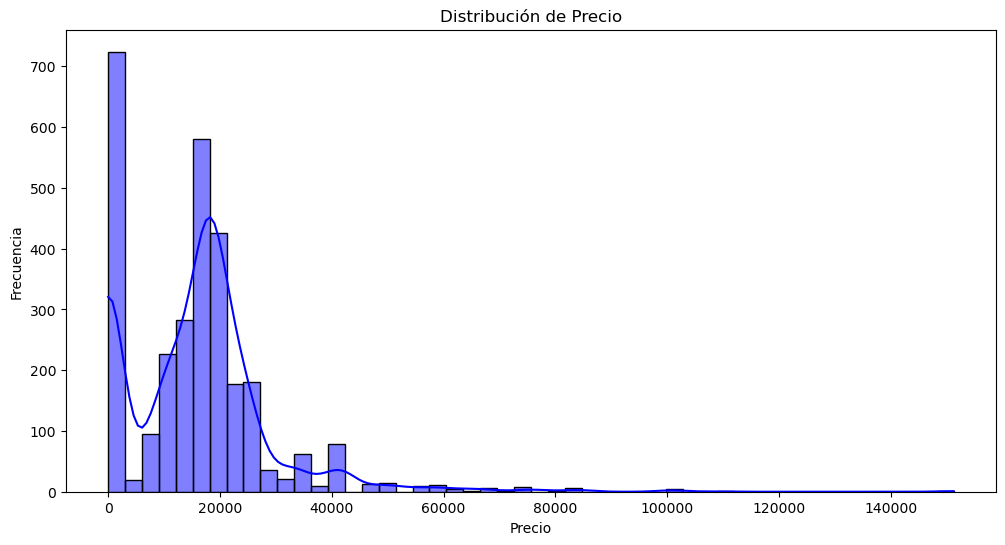

In [40]:
# Distribución de algunas variables clave (Ejemplo: TotalMercancia / Precio, Cantidad)
plt.figure(figsize=(12, 6))
sns.histplot(datos_anonimizados['Precio'], kde=True, color='blue', bins=50)
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27760\1914273134.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_quantity = datos_anonimizados.groupby('PriceRange')['Cantidad'].sum()


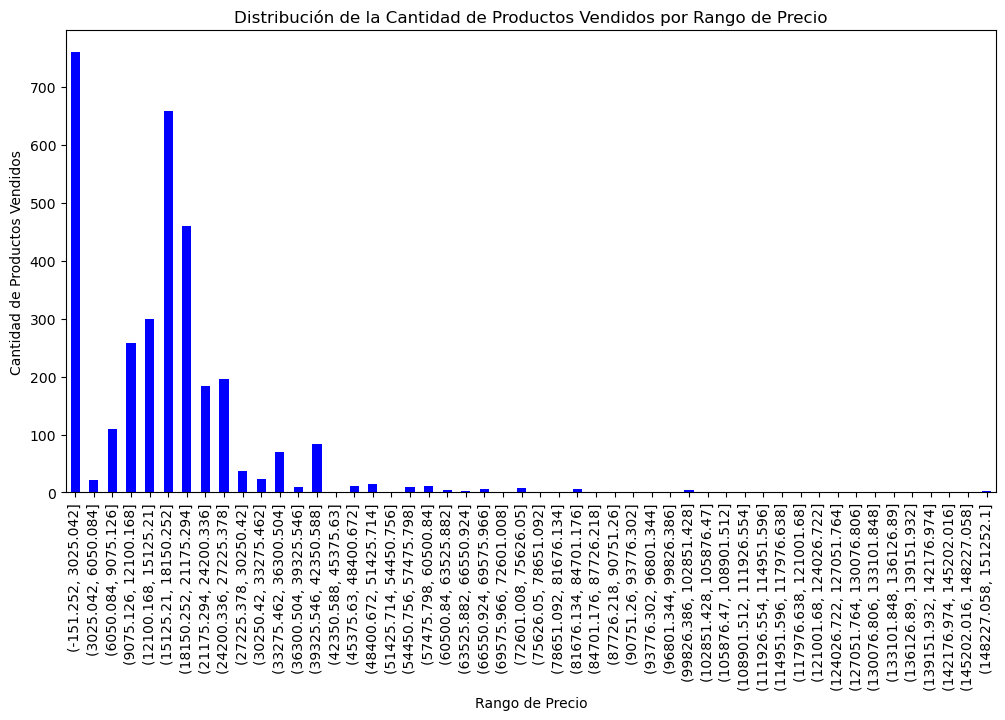

In [41]:
price_bins = pd.cut(datos_anonimizados['Precio'], bins=50)  # Dividir los precios en 50 intervalos
datos_anonimizados['PriceRange'] = price_bins

# Sumar la cantidad de productos vendidos en cada intervalo de precio
price_quantity = datos_anonimizados.groupby('PriceRange')['Cantidad'].sum()

# Graficar la distribución de la cantidad de productos vendidos en cada rango de precio
plt.figure(figsize=(12, 6))
price_quantity.plot(kind='bar', color='blue')
plt.title('Distribución de la Cantidad de Productos Vendidos por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad de Productos Vendidos')
plt.show()

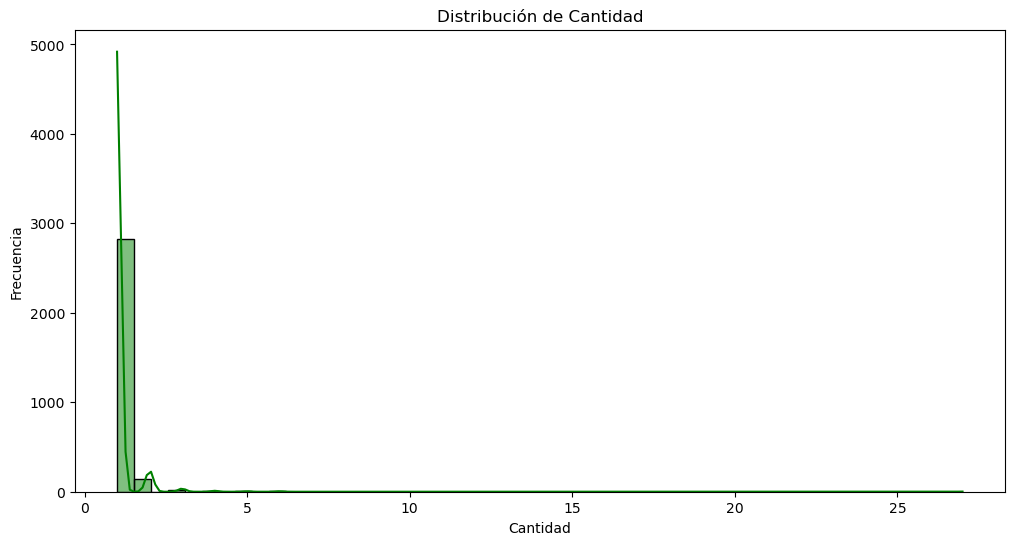

In [42]:
# Histograma de la columna "Cantidad" (puede adaptarse a otras variables numéricas)
plt.figure(figsize=(12, 6))
sns.histplot(datos_anonimizados['Cantidad'], kde=True, color='green', bins=50)
plt.title('Distribución de Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27760\1109004220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_anonimizados, x='MedioPago', palette='Set2')#barras,  cuántas veces se ha usado cada medio de pago.


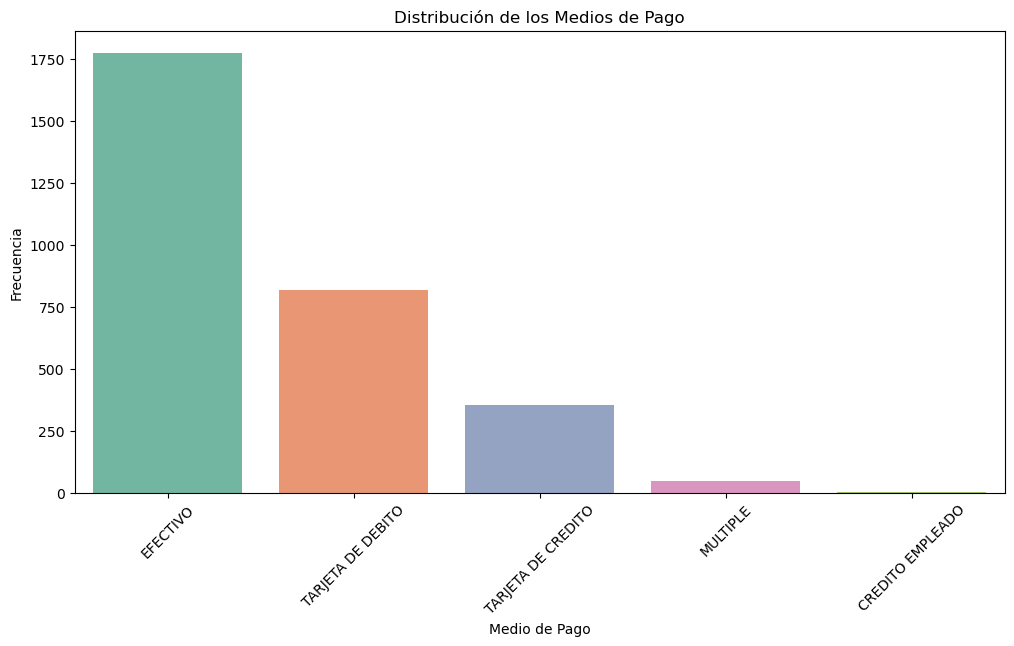

In [43]:
# Distribución de la variable 'MedioPago' (variable categórica)
plt.figure(figsize=(12, 6))#Pulgadas ancho, alto
sns.countplot(data=datos_anonimizados, x='MedioPago', palette='Set2')#barras,  cuántas veces se ha usado cada medio de pago.
plt.title('Distribución de los Medios de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Frecuencia')#es el número de veces (frecuencia) que cada tipo de medio de pago aparece en los datos.
plt.xticks(rotation=45)  # Rote las etiquetas si es necesario para mayor claridad
plt.show()

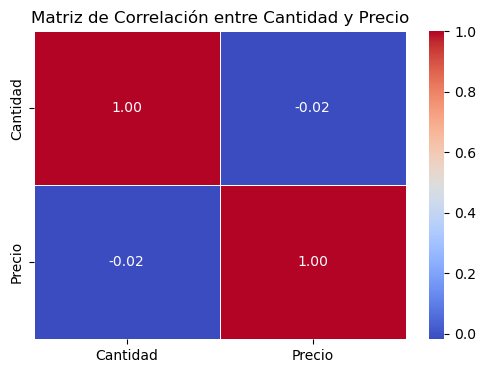

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas 'Cantidad' y 'Precio'
df_seleccionado = df[['Cantidad', 'Precio']]

# Calcular la matriz de correlación
correlation_matrix = df_seleccionado.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Cantidad y Precio')
plt.show()


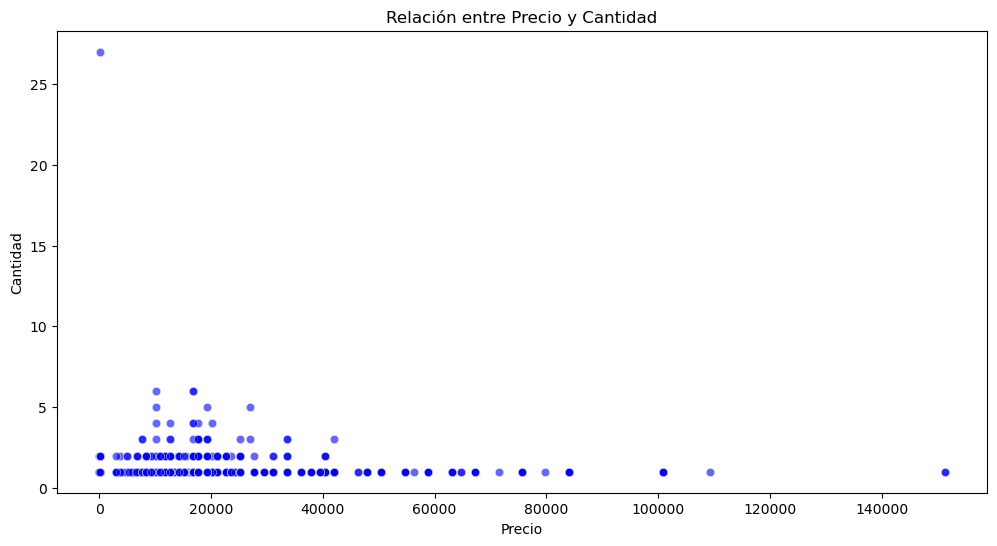

In [45]:
# Relación entre 'Precio' y 'Cantidad'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=datos_anonimizados, x='Precio', y='Cantidad', color='blue', alpha=0.6)
plt.title('Relación entre Precio y Cantidad')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27760\1735934012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_anonimizados, x='MedioPago', y='Precio', palette='Set2')


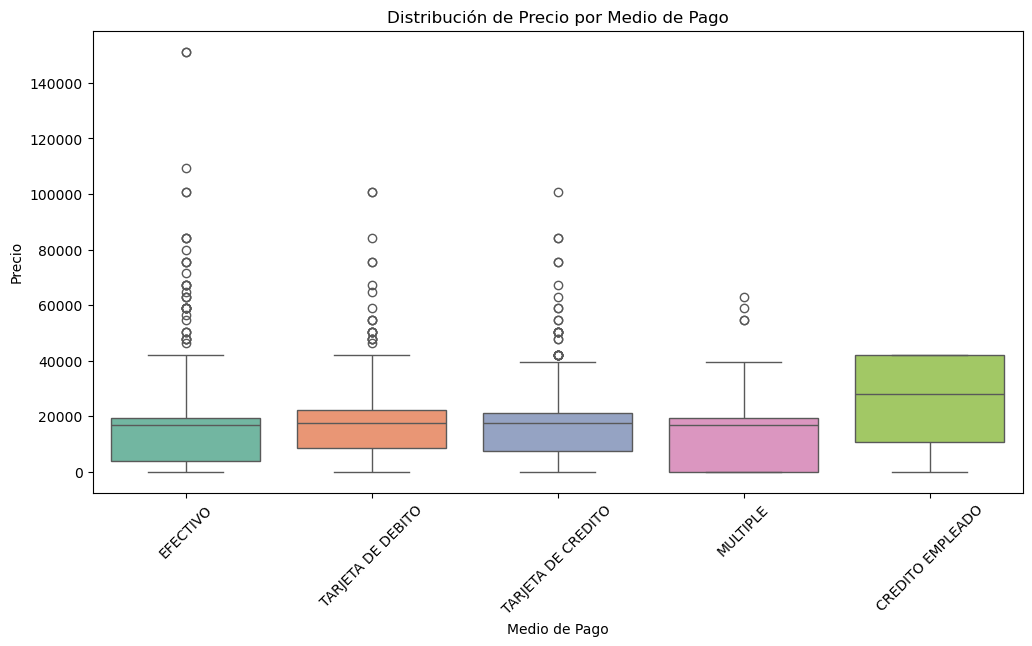

In [46]:
# Boxplot de la distribución de 'Precio' por 'MedioPago' (variable categórica)
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_anonimizados, x='MedioPago', y='Precio', palette='Set2')
plt.title('Distribución de Precio por Medio de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Precio')
plt.xticks(rotation=45)  # Rote las etiquetas si es necesario para mayor claridad
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27760\3709433608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_medio_pago.index, y=top_medio_pago.values, palette='Set2')


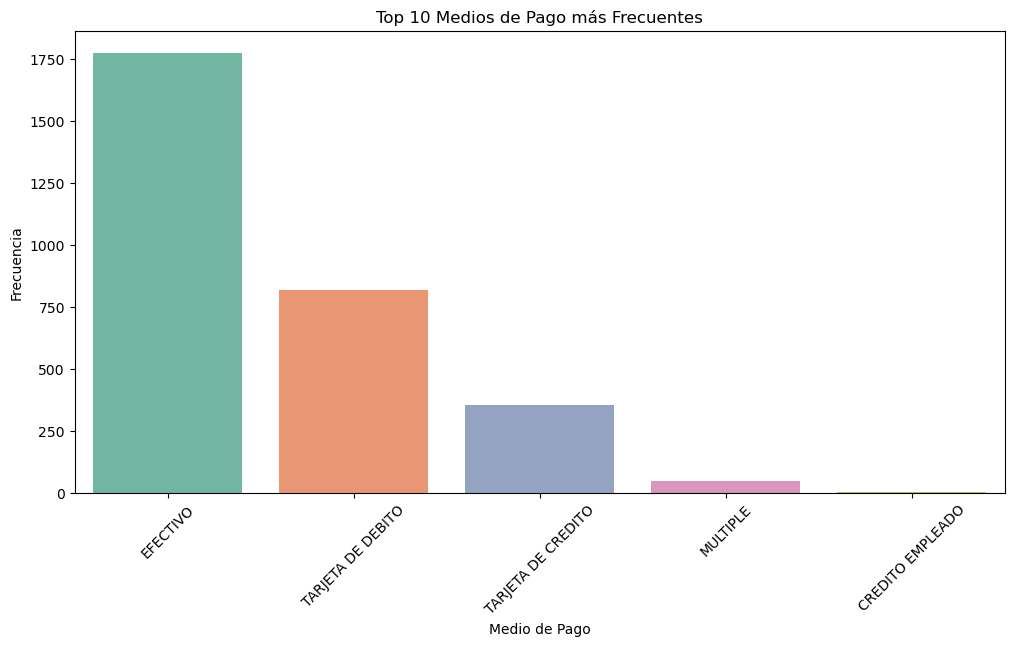

In [47]:
# Contar las categorías más frecuentes de 'MedioPago'
top_medio_pago = datos_anonimizados['MedioPago'].value_counts().head(5)

# Graficar las 10 categorías más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_medio_pago.index, y=top_medio_pago.values, palette='Set2')
plt.title('Top 10 Medios de Pago más Frecuentes')
plt.xlabel('Medio de Pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()